## Varun Tirumalasetty

Below is my comprehensive approach of dealing with unstructured data i.e., a json file by converting it into a structured format which is used for SQL operations for this task. Please read through the code and their respective markdown cells to understand the steps in this module.

### Pre-processing

In [1]:
import pandas as pd
import json

# Initialize an empty list to hold the parsed JSON objects
data = []

# Read and parse each JSON object individually
with open('C:/Users/varun/Downloads/Fetch/users.json', 'r') as file:
    for line in file:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")

# Let's proceed to normalization
flattened_data = pd.json_normalize(data)

In [2]:
# Export to CSV
flattened_data.to_csv('C:/Users/varun/Downloads/users_cleaned.csv', index=False)

In [3]:
# Initialize an empty list to hold the parsed JSON objects
data = []

# Read and parse each JSON object individually
with open('C:/Users/varun/Downloads/Fetch/brands.json', 'r') as file:
    for line in file:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")

# Let's proceed to normalization
flattened_data = pd.json_normalize(data)

In [4]:
# Export to CSV
flattened_data.to_csv('C:/Users/varun/Downloads/brands_cleaned.csv', index=False)

In [5]:
# Initialize an empty list to hold the parsed JSON objects
data = []

# Read and parse each JSON object individually
with open('C:/Users/varun/Downloads/Fetch/receipts.json', 'r') as file:
    for line in file:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")

# Let's proceed to normalization
flattened_data = pd.json_normalize(data)

In [6]:
# Export to CSV
flattened_data.to_csv('C:/Users/varun/Downloads/receipts_cleaned.csv', index=False)

### Data Loading

In [7]:
import pandas as pd

# Load the CSV files
users_df = pd.read_csv('C:/Users/varun/Downloads/Fetch/users_cleaned_file.csv')
receipts_df = pd.read_csv('C:/Users/varun/Downloads/Fetch/receipts_cleaned_csv.csv')
brands_df = pd.read_csv('C:/Users/varun/Downloads/Fetch/brands_cleaned_file.csv')

### Null Value Identification

In [8]:
# Function to list null values for each DataFrame
def list_null_values(df, df_name):
    print(f"Null Values in {df_name}:")
    null_values = df.isnull().sum()
    print(null_values[null_values > 0])  # Display only columns with null values
    print("\n")

# Apply the function to each DataFrame
list_null_values(users_df, "Users DataFrame")
list_null_values(receipts_df, "Receipts DataFrame")
list_null_values(brands_df, "Brands DataFrame")

Null Values in Users DataFrame:
signUpSource    48
state           56
lastLogin       62
dtype: int64


Null Values in Receipts DataFrame:
bonusPointsEarned          575
bonusPointsEarnedReason    575
finishedDate               551
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
totalSpent                 435
dtype: int64


Null Values in Brands DataFrame:
category        155
categoryCode    650
topBrand        612
brandCode       269
dtype: int64




### Duplicate Row Check

In [9]:
# Function to check for duplicate rows in each DataFrame
def check_duplicates(df, df_name):
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows in {df_name}: {duplicates}")

# Apply the function to each DataFrame
check_duplicates(users_df, "Users DataFrame")
check_duplicates(receipts_df, "Receipts DataFrame")
check_duplicates(brands_df, "Brands DataFrame")

Number of duplicate rows in Users DataFrame: 283
Number of duplicate rows in Receipts DataFrame: 0
Number of duplicate rows in Brands DataFrame: 0


### Data Type Correction

In [10]:
# Correcting data types for date columns and categorical columns
# Convert timestamp columns to datetime
# Assuming the timestamp is in milliseconds since the epoch
users_df['createdDate'] = pd.to_datetime(users_df['createdDate'], unit='ms')
users_df['lastLogin'] = pd.to_datetime(users_df['lastLogin'], unit='ms')

In [11]:
receipts_df['createDate'] = pd.to_datetime(receipts_df['createDate'], unit='ms')
receipts_df['dateScanned'] = pd.to_datetime(receipts_df['dateScanned'], unit='ms')
receipts_df['finishedDate'] = pd.to_datetime(receipts_df['finishedDate'], unit='ms')
receipts_df['modifyDate'] = pd.to_datetime(receipts_df['modifyDate'], unit='ms')
receipts_df['pointsAwardedDate'] = pd.to_datetime(receipts_df['pointsAwardedDate'], unit='ms')
receipts_df['purchaseDate'] = pd.to_datetime(receipts_df['purchaseDate'], unit='ms')

In [12]:
# Convert categorical data that's incorrectly typed as numerical (e.g., `barcode` in brands) to strings
brands_df['barcode'] = brands_df['barcode'].astype(str)

In [13]:
# Print out the first few rows of the cleaned dataframes to verify changes
print("Users DataFrame:")
users_df.head()

Users DataFrame:


,active,role,signUpSource,state,_id,createdDate,lastLogin
0,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 16:06:40,2021-01-03 16:06:40
1,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 16:06:40,2021-01-03 16:06:40
2,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 16:06:40,2021-01-03 16:06:40
3,True,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6,2021-01-03 16:06:40,2021-01-03 16:06:40
4,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 16:06:40,2021-01-03 16:06:40


In [14]:
print("\nReceipts DataFrame:")
receipts_df.head()


Receipts DataFrame:


,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 16:06:40,2021-01-03 16:06:40,2021-01-03 16:06:40,2021-01-03 16:06:40,2021-01-03 16:06:40,500.0,2021-01-02 23:26:40,5.0,FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 16:06:40,2021-01-03 16:06:40,2021-01-03 16:06:40,2021-01-03 16:06:40,2021-01-03 16:06:40,150.0,2021-01-02 15:06:40,2.0,FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 16:06:40,2021-01-03 16:06:40,NaT,2021-01-03 16:06:40,NaT,5.0,2021-01-02 23:26:40,1.0,REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 16:06:40,2021-01-03 16:06:40,2021-01-03 16:06:40,2021-01-03 16:06:40,2021-01-03 16:06:40,5.0,2021-01-02 23:26:40,4.0,FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 16:06:40,2021-01-03 16:06:40,2021-01-03 16:06:40,2021-01-03 16:06:40,2021-01-03 16:06:40,5.0,2021-01-02 15:06:40,2.0,FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [15]:
print("\nBrands DataFrame:")
brands_df.head()


Brands DataFrame:


,barcode,category,categoryCode,name,topBrand,_id.$oid,cpg.$id.$oid,cpg.$ref,brandCode
0,511111019862,Baking,BAKING,test brand @1612366101024,False,601ac115be37ce2ead437551,601ac114be37ce2ead437550,Cogs,NaN
1,511111519928,Beverages,BEVERAGES,Starbucks,False,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,Cogs,STARBUCKS
2,511111819905,Baking,BAKING,test brand @1612366146176,False,601ac142be37ce2ead43755d,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146176
3,511111519874,Baking,BAKING,test brand @1612366146051,False,601ac142be37ce2ead43755a,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146051
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,False,601ac142be37ce2ead43755e,5332fa12e4b03c9a25efd1e7,Cogs,TEST BRANDCODE @1612366146827


### Exploratory Visualizations

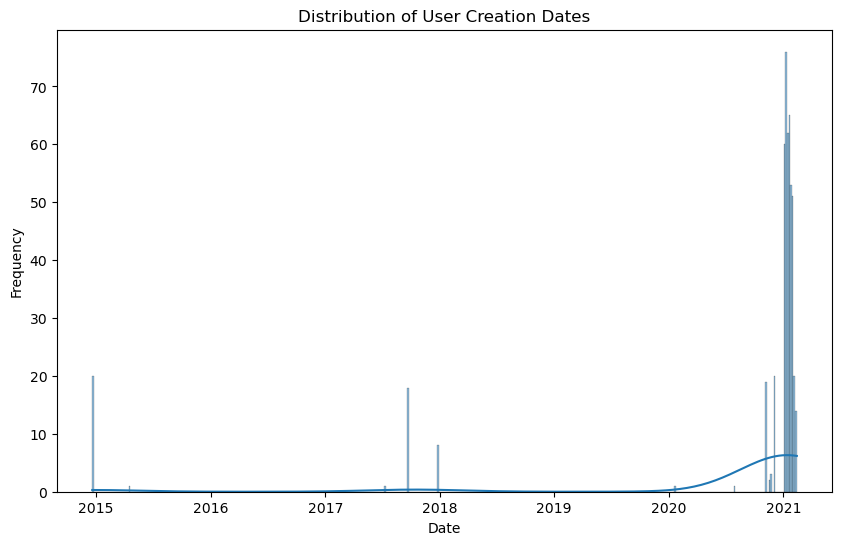

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(users_df['createdDate'], kde=True)
plt.title('Distribution of User Creation Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

The histogram displays the distribution of user account creation dates from our dataset, spanning from 2015 to 2021. The data shows that user sign-ups were relatively low from 2015 until late 2018. Starting in 2019, there's a noticeable increase, culminating in a sharp rise in new accounts by 2021. This trend could indicate a growing popularity or successful user acquisition strategies during these years, with a particularly effective approach in 2021 warranting further investigation.

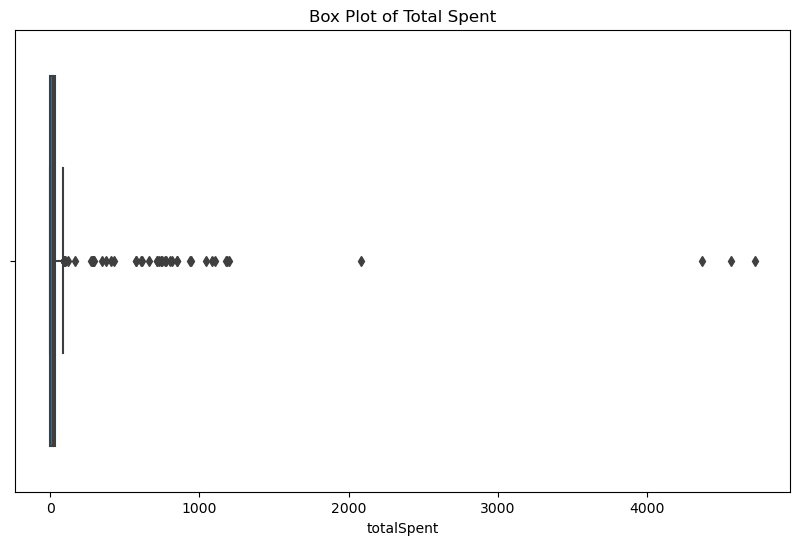

In [17]:
# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=receipts_df['totalSpent'])
plt.title('Box Plot of Total Spent')
plt.show()

From the plot, we can infer that most of the spending is concentrated within a relatively low range, with a few instances of significantly higher spending. These outliers suggest that while most transactions fall within a certain spending bracket, there are occasional purchases that are much higher than average. This could be useful for identifying spending patterns or segmenting customer behavior.

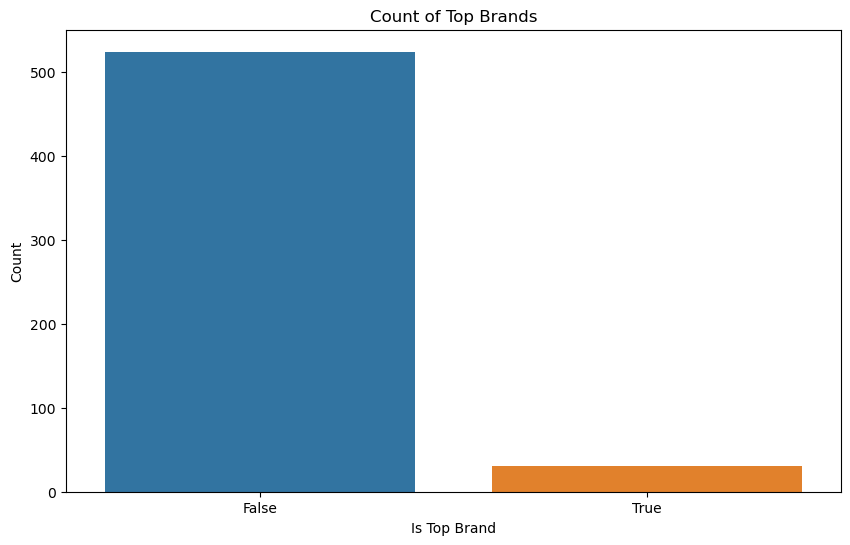

In [18]:
# Count plot for a categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(x=brands_df['topBrand'])
plt.title('Count of Top Brands')
plt.xlabel('Is Top Brand')b
plt.ylabel('Count')
plt.show()

The bar chart from the brands dataset indicates that there are far more non-top brands than there are top brands. This suggests a wide variety of brands in the dataset, with only a select few categorized as top brands.

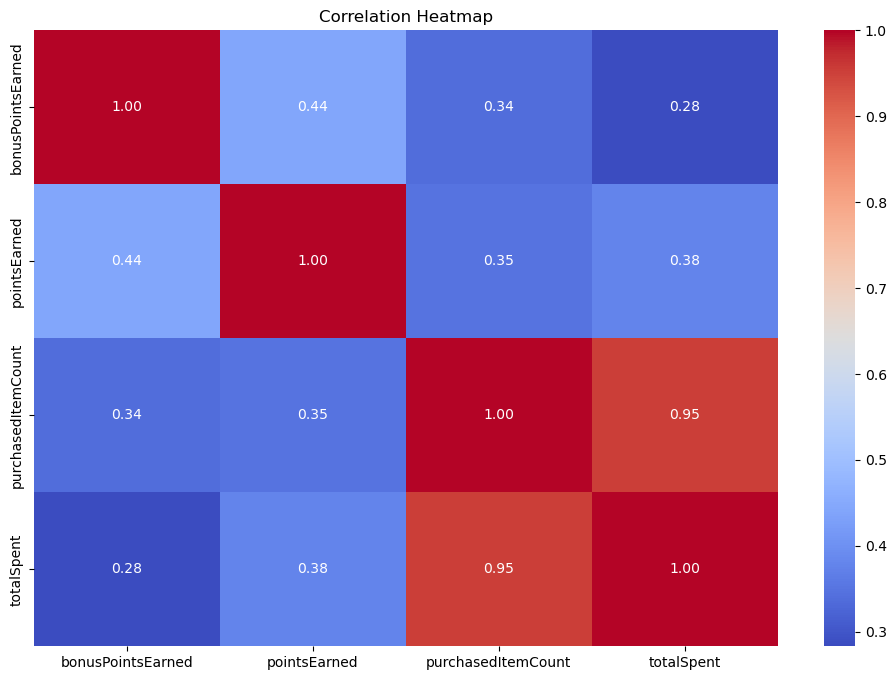

In [19]:
import numpy as np

# Correlation heatmap for numeric variables
plt.figure(figsize=(12, 8))
correlation_matrix = receipts_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The correlation between purchasedItemCount and totalSpent is notably high, indicated by a dark red square (0.95), suggesting that as the number of items purchased increases, the total amount spent tends to increase as well.
bonusPointsEarned and pointsEarned have a moderate positive correlation (0.44), implying some relationship between these two variables, although not as strong as purchasedItemCount and totalSpent.
Other variables show low to moderate correlations with each other (ranging from

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


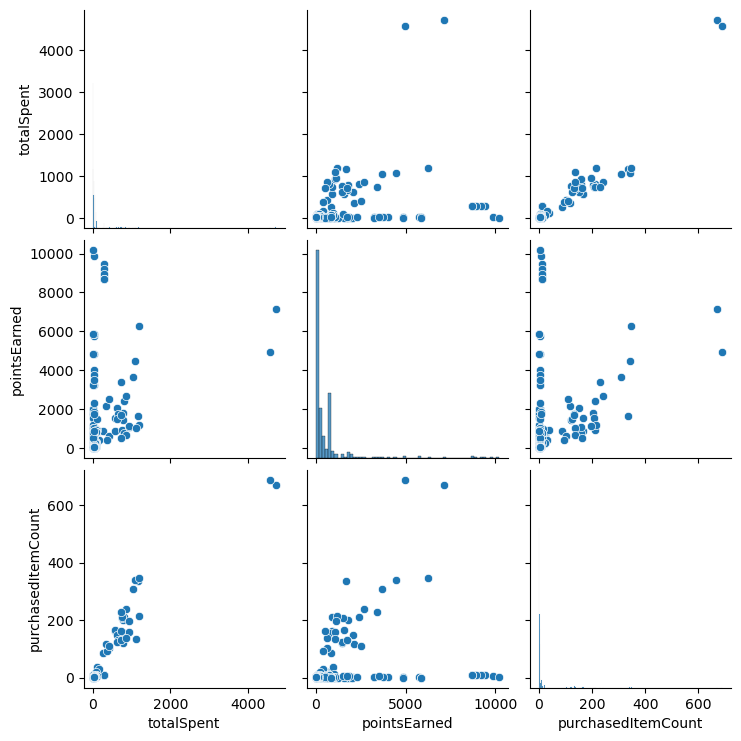

In [20]:
# Pair plot for a subset of variables to see pairwise relationships
sns.pairplot(receipts_df[['totalSpent', 'pointsEarned', 'purchasedItemCount']].dropna())
plt.show()

The scatter plot matrix provides a visual comparison between 'totalSpent', 'pointsEarned', and 'purchasedItemCount' from our dataset. It indicates a positive correlation between the amount spent and both the points earned and the number of items purchased, although the relationships aren't strictly linear and there are some outliers. These outliers suggest special cases or possible data entry errors. Overall, this matrix is a helpful tool for identifying trends and anomalies in our dataset that may warrant further investigation.

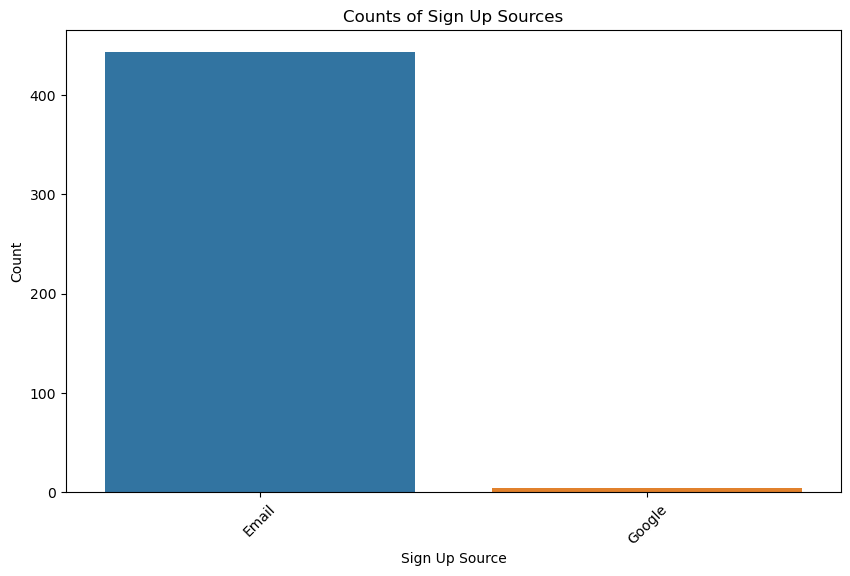

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='signUpSource', data=users_df)
plt.title('Counts of Sign Up Sources')
plt.xlabel('Sign Up Source')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.show()

This plot indicates that the source of sign ups from emails is way higher than those compared to the ones from google

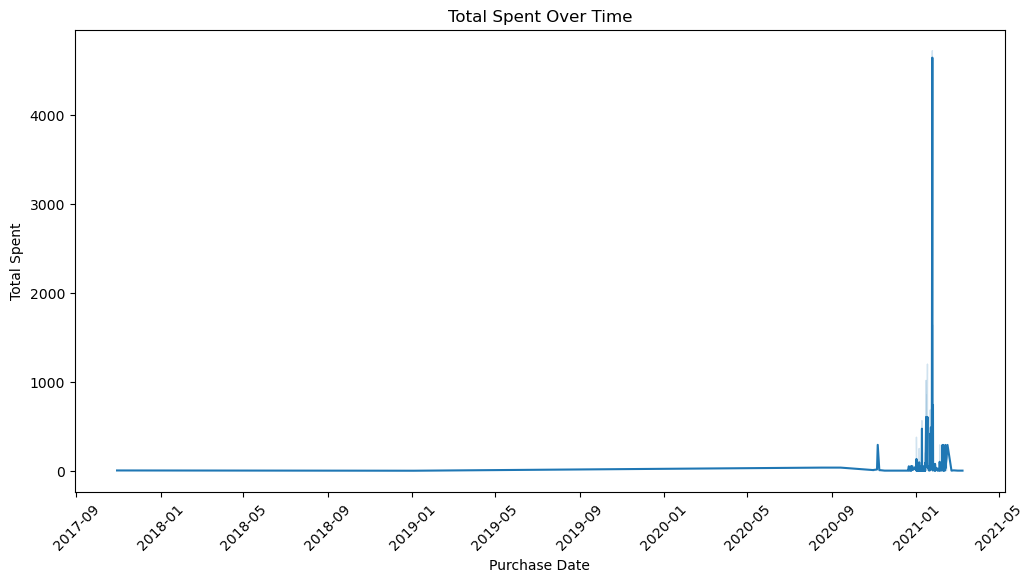

In [22]:
# Converting 'purchaseDate' to datetime format
receipts_df['purchaseDate'] = pd.to_datetime(receipts_df['purchaseDate'], unit='ms')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='purchaseDate', y='totalSpent', data=receipts_df)
plt.title('Total Spent Over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.show()

The line graph depicts the 'Total Spent' over time, with the x-axis representing the purchase date ranging from late 2017 to mid-2021. There is a notable spike in spending near mid-2021, where total expenditures dramatically increase. Prior to this surge, the spending levels appear relatively low with some minor fluctuations. This spike could indicate a significant event or change in customer behavior, such as a successful marketing campaign, seasonality, or the introduction of a popular product. This observation would be a point of interest for the business to understand the underlying factors contributing to such a marked increase in spending.